In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [25]:
df = pd.read_csv(r"C:\Users\user\Downloads\data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# 3. Modelling

#We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [27]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled

In [29]:
# Initialize the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the classifier to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
#Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [31]:
# Evaluate the model using multiple metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Accuracy: 0.90, Precision: 0.83, Recall: 0.05, F1 Score: 0.10


## summary of performance metrics 

The results provided (Accuracy: 0.90, Precision: 0.83, Recall: 0.05, F1 Score: 0.10) suggest a model that has high accuracy but is not performing well in terms of recall. Let's interpret these metrics in the context of the customer churn problem:

Accuracy (0.90):

The high accuracy indicates that 90% of the predictions made by the model are correct. However, accuracy alone may not be the most informative metric, especially in imbalanced datasets where one class (churn) is much smaller than the other.
Precision (0.83):

Precision of 0.83 means that out of the instances predicted as churn, 83% are actually churn. This is relatively good and suggests that when the model predicts churn, it is often correct.
Recall (0.05):

A recall of 0.05 implies that the model is capturing only 5% of the actual churn instances. This is very low and indicates that the model is missing a significant portion of customers who are actually churning.
F1 Score (0.10):

The F1 score is the harmonic mean of precision and recall. Given the low recall, the F1 score is also quite low. The low F1 score suggests that the model is not achieving a good balance between precision and recall.
In the context of the customer churn problem, recall is often a critical metric because it measures the model's ability to identify customers who are actually churning. A low recall means that the model is missing a substantial number of churn cases, which might not be acceptable for PowerCo.

##Recommendations:

Given the nature of the problem, where identifying customers who are likely to churn is crucial for PowerCo, it might be necessary to prioritize recall over precision.
Consider adjusting the prediction threshold to increase sensitivity (recall) even if it results in lower precision. This can be done to capture more true positives.
Explore additional techniques such as feature engineering, model tuning, or different algorithms to improve the model's ability to identify churn cases


## How to improve recall and F1 score 

Improving recall and F1 score often involves addressing the issue of false negatives, where the model fails to identify positive instances correctly. Here are some strategies to improve recall and F1 score:

Adjust Prediction Threshold:

By default, classification models use a probability threshold of 0.5 to make predictions. Lowering this threshold can increase recall by making the model more sensitive to positive instances. However, this might come at the cost of lower precision.

In [32]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_prob > 0.3).astype(int)  # Adjust the threshold as needed


In [33]:
from sklearn.metrics import recall_score, f1_score

# Assuming 'y_pred_prob' is the predicted probabilities for the positive class
# Assuming 'y_test' is the true labels for the test set

# Adjust the threshold (example threshold is 0.3)
threshold = 0.3
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Calculate recall and F1 score
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Adjusted Recall: {recall:.2f}")
print(f"Adjusted F1 Score: {f1:.2f}")


Adjusted Recall: 0.19
Adjusted F1 Score: 0.26


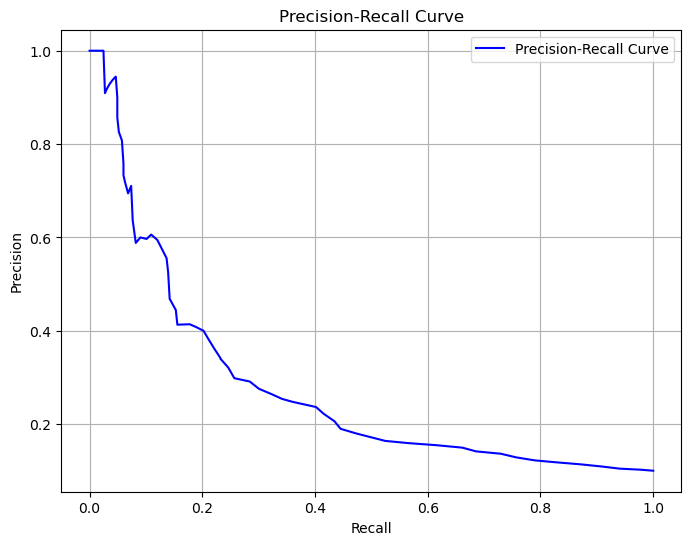

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'y_pred_prob' is the predicted probabilities for the positive class
# Assuming 'y_test' is the true labels for the test set

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
